#### **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### **Load the Dataset**

In [2]:
df = pd.read_csv('high-school-directory.csv')
df.head()


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


#### **Clean Column Names**

In [3]:
df.columns = (
    df.columns.str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^\w\s]', '', regex=True)
)

In [4]:
df.head(3)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52


#### **Exploring Data**

In [5]:
print(df.columns.tolist())

['dbn', 'school_name', 'borough', 'building_code', 'phone_number', 'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min', 'expgrade_span_max', 'bus', 'subway', 'primary_address_line_1', 'city', 'state_code', 'postcode', 'website', 'total_students', 'campus_name', 'school_type', 'overview_paragraph', 'program_highlights', 'language_classes', 'advancedplacement_courses', 'online_ap_courses', 'online_language_courses', 'extracurricular_activities', 'psal_sports_boys', 'psal_sports_girls', 'psal_sports_coed', 'school_sports', 'partner_cbo', 'partner_hospital', 'partner_highered', 'partner_cultural', 'partner_nonprofit', 'partner_corporate', 'partner_financial', 'partner_other', 'addtl_info1', 'addtl_info2', 'start_time', 'end_time', 'se_services', 'ell_programs', 'school_accessibility_description', 'number_programs', 'priority01', 'priority02', 'priority03', 'priority04', 'priority05', 'priority06', 'priority07', 'priority08', 'priority09', 'priority10', 'location_1', 'comm

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dbn                               435 non-null    object 
 1   school_name                       435 non-null    object 
 2   borough                           435 non-null    object 
 3   building_code                     435 non-null    object 
 4   phone_number                      435 non-null    object 
 5   fax_number                        423 non-null    object 
 6   grade_span_min                    432 non-null    float64
 7   grade_span_max                    435 non-null    int64  
 8   expgrade_span_min                 31 non-null     float64
 9   expgrade_span_max                 33 non-null     float64
 10  bus                               434 non-null    object 
 11  subway                            358 non-null    object 
 12  primary_

#### **Filter for Schools in Brooklyn**

In [7]:
brooklyn_schools = df[df['borough'].str.upper() == 'BROOKLYN']
brooklyn_schools.head(5)

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,council_district,census_tract,bin,bbl,nta,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
7,17K122,Pathways in Technology Early College High Scho...,Brooklyn,K625,718-221-1593,718-221-1781,9.0,12,9.0,14.0,...,36.0,311.0,3030553.0,3.012160e+09,Crown Heights North ...,17615.0,16,2,49,49
10,23K644,Eagle Academy for Young Men II,Brooklyn,K271,718-495-0863,718-732-2129,6.0,12,NaN,NaN,...,41.0,301.0,3042157.0,3.015500e+09,Ocean Hill ...,13516.0,55,2,17,46
12,15K462,Secondary School for Law,Brooklyn,K460,718-832-4250,718-499-3947,9.0,12,NaN,NaN,...,39.0,155.0,3025510.0,3.010820e+09,Park Slope-Gowanus ...,17617.0,14,2,27,50


#### **Answer the Questions**

##### 1. Total Unique Schools in Brooklyn(we used here 'dbn' column for unique schools)

In [8]:
total_unique_bk_schools = brooklyn_schools['dbn'].nunique()
print(f'Total Unique Schools in Brooklyn: {total_unique_bk_schools}')

Total Unique Schools in Brooklyn: 121


##### 2. Schools in Brooklyn offer Grade 9 Entry

In [ ]:
# convert grade span column to numeric
brooklyn_schools['grade_span_min'] = pd.to_numeric(brooklyn_schools['grade_span_min'], errors='coerce')
brooklyn_schools['grade_span_max'] = pd.to_numeric(brooklyn_schools['grade_span_max'], errors='coerce');

In [10]:
# Filter schools where grade 9 is included in the span
bk_grade_9 = brooklyn_schools[
    (brooklyn_schools['grade_span_min'] <= 9) &
    (brooklyn_schools['grade_span_max'] >= 9)
]

In [11]:
# Count unique schools offering grade 9
total_bk_grade_9_schools = bk_grade_9['dbn'].nunique()
print(f'Total Brooklyn Schools offering Grade 9 Entry: {total_bk_grade_9_schools}')

Total Brooklyn Schools offering Grade 9 Entry: 121


#### **Group and Summarize**

##### Count of Schools per borough(unique schools)

In [12]:
school_counts = df.groupby('borough')['school_name'].nunique()
print(school_counts)

borough
Bronx            118
Brooklyn         121
Manhattan        106
Queens            80
Staten Island     10
Name: school_name, dtype: int64


##### Average number of Students per borough

In [13]:
# Convert total_students to numeric
df['total_students'] = pd.to_numeric(df['total_students'], errors='coerce')

In [14]:
# Average number of students per borough
average_students = df.groupby('borough')['total_students'].mean()
print(average_students)

borough
Bronx             490.406780
Brooklyn          699.134454
Manhattan         589.825243
Queens           1046.644737
Staten Island    1847.500000
Name: total_students, dtype: float64


##### Summery of grade_span_max grouped by borough

In [15]:
# Convert to Numeric
df['grade_span_max'] = pd.to_numeric(df['grade_span_max'], errors='coerce')

In [18]:
grade_span_summary = df.groupby('borough')['grade_span_max'].describe()
print(grade_span_summary)

               count       mean       std   min   25%   50%   75%   max
borough                                                                
Bronx          118.0  11.906780  0.369506   9.0  12.0  12.0  12.0  12.0
Brooklyn       121.0  11.933884  0.381566   9.0  12.0  12.0  12.0  12.0
Manhattan      106.0  11.877358  0.472135   9.0  12.0  12.0  12.0  12.0
Queens          80.0  11.825000  0.497462  10.0  12.0  12.0  12.0  12.0
Staten Island   10.0  12.000000  0.000000  12.0  12.0  12.0  12.0  12.0


#### **Visualization**

##### Number of Schools per borough

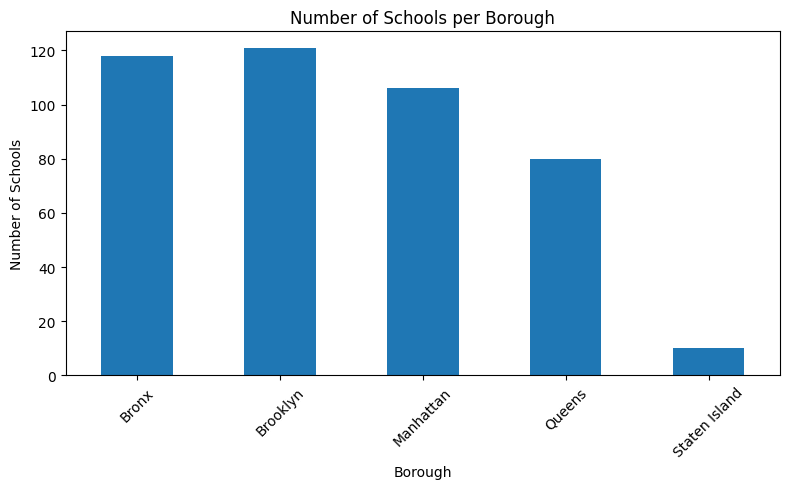

In [19]:
school_counts.plot(kind='bar', title='Number of Schools per Borough', figsize=(8, 5))
plt.xlabel('Borough')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **Key Insights:**
##### - Brooklyn has the highest number of schools, confirming it provides broad access to secondary education. Staten Island, by contrast, has only few schools.
##### - Staten Island schools have the largest average enrollment (~1,848 students), followed by Queens.
##### - Most schools across boroughs extend up to Grade 12, but some exceptions exist (a few ending at Grade 10 or 11). This points to specialized or alternative schools.
##### - The distribution is uneven — Brooklyn and Manhattan are highly saturated with schools, while Staten Island has very few but much larger average enrollments. This suggests differences in population density, demand, and school size strategy.